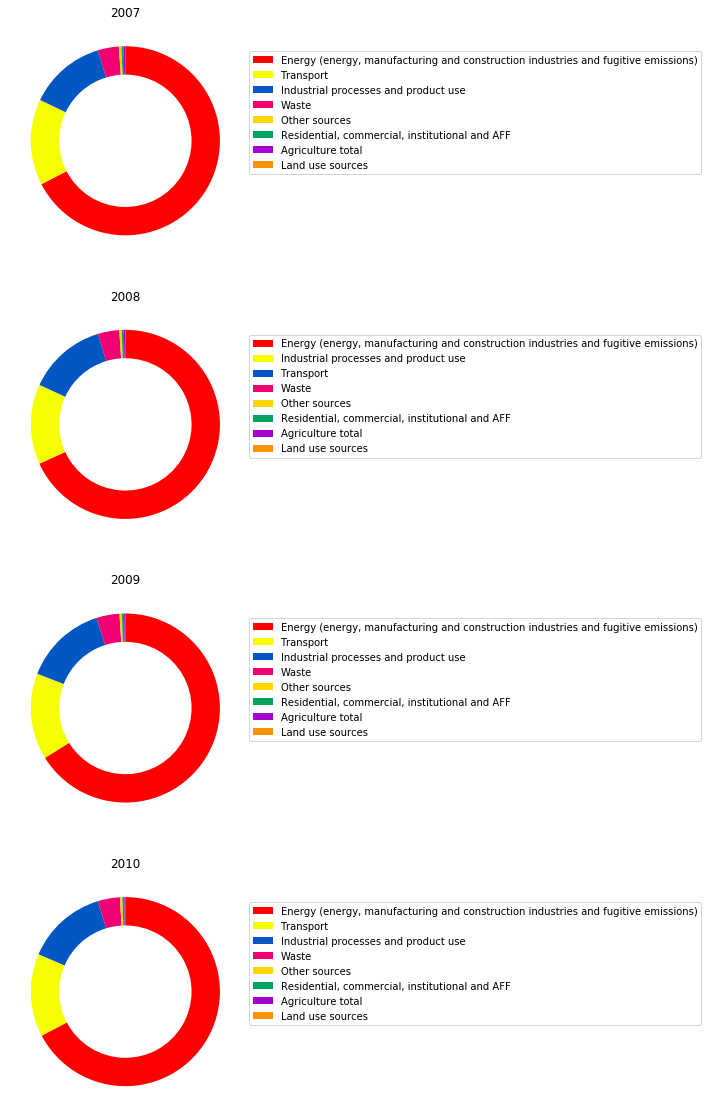

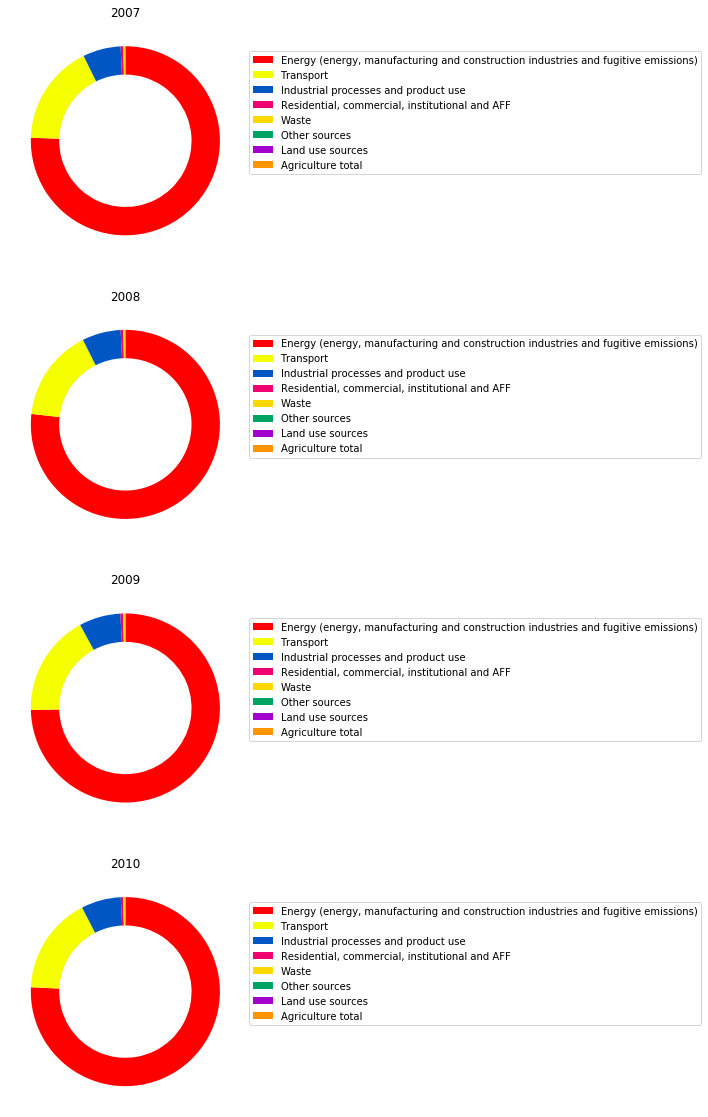

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-deep')
import copy
#if unable to run tensorflow, comment out all keras imports and LSTM methods and code
#note that results may differ due to the nature of machine learning
'''from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import load_model'''
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from scipy.interpolate import make_interp_spline, BSpline
from mpl_toolkits.axes_grid1 import make_axes_locatable

regions = ['Arab World', 'Central Europe and the Baltics', 'Caribbean small states', 'East Asia & Pacific (excluding high income)',
           'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia',
           'Euro area', 'European Union', 'Fragile and conflict affected situations', 'High income', 'Heavily indebted poor countries (HIPC)',
           'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Not classified', 'Latin America & Caribbean (excluding high income)',
           'Latin America & Caribbean', 'Least developed countries: UN classification', 'Low income', 'Lower middle income', 'Low & middle income',
           'Late-demographic dividend', 'Middle income', 'Middle East & North Africa', 'Middle East & North Africa (excluding high income)', 'OECD members', 'Other small states',
           'Pre-demographic dividend', 'Pacific island small states', 'Post-demographic dividend', 'Sub-Saharan Africa (excluding high income)',
           'Sub-Saharan Africa', 'Small states', 'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)',
           'Latin America & the Caribbean (IDA & IBRD countries)', 'Middle East & North Africa (IDA & IBRD countries)', 'South Asia (IDA & IBRD)',
           'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income', 'South Asia', 'North America', 'World']

world = ['World']

#targets = ['World', 'United States', 'China', 'Russian Federation', 'Singapore', 'European Union', 'Japan', 'Korea, Rep.', 'India', 'Brazil', 'Middle East & North Africa', 'Sub-Saharan Africa']
targets = ['World', 'United States', 'China', 'Russian Federation', 'Singapore', 'Japan', 'Korea, Rep.', 'India', 'Brazil', 'United Kingdom', 'France', 'Germany', 'Norway', 'Denmark', 'Sweden', 'Australia', 'Finland', 'European Union']

overlap = np.r_[31:53]
sus = [0, 1, 2, 4, 5, 17, 18, 20, 21, 22, 24, 26, 27, 28, 34]
dev = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 23, 25, 29, 30, 31, 32, 33]
overall = [0, 1, 2, 4, 5, 17, 18, 20, 21, 22, 24, 26, 27, 28, 34, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 23, 25, 29, 30, 31, 32, 33]
csvs = pd.DataFrame(columns = ['csv', 'title', '~nan', 'source'])
csvs.loc[0] = ["CO2E.KT.csv", "CO2 Emissions/kilotons", np.r_[0:55], 1]
csvs.loc[1] = ["CO2EPC.MT.csv", "CO2 Emissions Per Capita/megatons", np.r_[0:55], 1]
csvs.loc[2] = ["GHGE.KT.csv", "Greenhouse Gas Emissions/kilotons", np.r_[10:53], 1]
csvs.loc[3] = ["LE.Y.csv", "Life Expectancy/years", np.r_[0:58], 1]
csvs.loc[4] = ["REC.P.csv", "Renewable Energy Consumption/%", np.r_[30:56], 1]
csvs.loc[5] = ["REO.P.csv", "Renewable Electricity Output/%", np.r_[30:56], 1]
csvs.loc[6] = ["IMR.csv", "Infant Mortality Rate", np.r_[0:58], 1]
csvs.loc[7] = ["UEM.P.csv", "Unemployment Rate/%", np.r_[31:59], 1]
csvs.loc[8] = ["GDPPCG.P.csv", "GDP Per Capita Growth/%", np.r_[0:59], 1]
csvs.loc[9] = ["GDPPC.USD.csv", "GDP Per Capita/USD", np.r_[0:59], 1]
csvs.loc[10] = ["GDPPC.PPP.csv", "GDP Per Capita/PPP", np.r_[30:59], 1]
csvs.loc[11] = ["NET.P.csv", "Internet Usage/%", np.r_[30:59], 1]
csvs.loc[12] = ["CELL.csv", "Mobile Phone Subscriptions/100 people", np.r_[30:59], 1]
csvs.loc[13] = ["SANITATION.P.csv", "People Using Safely Managed Sanitation Services/%", np.r_[40:58], 1]
csvs.loc[14] = ["WATER.P.csv", "People Using Safely Managed Drinking Water Services/%", np.r_[40:58], 1]
csvs.loc[15] = ["GNIPCG.P.csv", "GNI Per Capita Growth/%", np.r_[1:59], 1]
csvs.loc[16] = ["GDPG.P.csv", "GDP Growth/%", np.r_[1:59], 1]
csvs.loc[17] = ["FRSTA.P.csv", "Forest Area/%", np.r_[30:57], 1]
csvs.loc[18] = ["FRSTA.KM2.csv", "Forest Area/km2", np.r_[30:57], 1]
csvs.loc[19] = ["GNIG.P.csv", "GNI Growth/%", np.r_[0:59], 1]
csvs.loc[20] = ["EPFOSL.P.csv", "Electricity Production from Fossil Fuels (Oil, Gas, Coal)/%", np.r_[11:56], 1]
csvs.loc[21] = ["FFEC.P.csv", "Fossil Fuel Energy Consumption/%", np.r_[11:55], 1]
csvs.loc[22] = ["EPCPC.KWH.csv", "Electric Power Consumption Per Capita/kWh", np.r_[11:55], 1]
csvs.loc[23] = ["HDI.csv", "Human Development Index", np.r_[30:58], 2]
csvs.loc[24] = ["AMT.C.csv", "Annual Mean Temperature/degC", np.r_[0:53], 3]
csvs.loc[25] = ["AE.P.csv", "Access to Electricity/%", np.r_[30:58], 1]
csvs.loc[26] = ["EUPC.KG.csv", "Energy Use Per Capita/kg oil", np.r_[11:55], 1]
csvs.loc[27] = ["CCPC.T.csv", "Coal Consumption Per Capita/tonnes", np.r_[5:57], 4]
csvs.loc[28] = ["OCPC.T.csv", "Oil Consumption Per Capita/tonnes", np.r_[5:57], 4]
csvs.loc[29] = ["EI.csv", "Education Index", np.r_[30:58], 5]
csvs.loc[30] = ["MYOS.csv", "Mean Years of Schooling", np.r_[30:58], 5]
csvs.loc[31] = ["GNIPC.PPP.csv", "GNI Per Capita/PPP", np.r_[30:59], 1]
csvs.loc[32] = ["IH.csv", "Intentional Homicides/100000 people", np.r_[30:58], 1]
csvs.loc[33] = ["GNIPC.USD.csv", "GNI Per Capita/USD", np.r_[2:59], 1]
csvs.loc[34] = ["CEI.USD.csv", "Carbon Emission Intensity/kg CO2 per USD", np.r_[0:55], 1]

# preprocess
temperature = pd.read_csv("T.C.csv", index_col=None, parse_dates=True)
time_period = np.arange('1960-01-01', '2018-01-01', dtype='datetime64[M]')
temperature = temperature.loc[temperature['Period'].str.contains('/')]
temperature['Period'] = pd.to_datetime(temperature['Period'], format='%d/%m/%Y')
# print(temperature['Period'])
temperature = temperature.loc[temperature['Period'].isin(time_period)]
# print(temperature_new['Period'])
temperature = temperature.pivot(index="Country", columns="Period", values="Value").rename_axis(None, axis=1)
# temperature = temperature[time_period]
# print(temperature)
temperature_new = temperature.T.resample('Y').mean()
temperature_new.index = temperature_new.index.year
temperature_new = temperature_new.T
temperature_new.rename(index={'South Korea': 'Korea, Rep.', 'Russia': 'Russian Federation'}, inplace=True)
temperature_new.to_csv('AMT.C.csv')
'''#IMPT: csv file must be UTF-8 encoded, this can be done by clicking 'Save As' -> 'Tools' -> 'Web Options' -> 'Encoding' and selecting UTF-8
with open('AMT.C.csv', 'w') as f:
    f.write('\n'*4)
    temperature_new.to_csv(f)'''

def gen_pie(years, df):
    fig, axs = plt.subplots(len(years), 1, figsize=(20, 20), subplot_kw=dict(aspect="equal"))
    cmap = plt.get_cmap('prism')
    colors = [cmap(i) for i in np.linspace(0, 1, len(df.index) + 1)]
    for t in range(len(years)):
        d = df[years[t]].sort_values(ascending=False, kind='mergesort')
        axs[t].pie(d, wedgeprops=dict(width=0.3), counterclock=False, colors=colors, labels=d.index, startangle=90, labeldistance=None)
        axs[t].legend(loc=0, bbox_to_anchor=(1, 0.4, 1, 0.5))
        axs[t].set_title(str(years[t]))
        # axs[t].set_prop_cycle(color=['red', 'yellow', 'green', 'cyan', 'blue', 'magenta', 'purple', 'black'])

    plt.show()

#preprocess 2
sector = pd.read_csv("SECTOR.csv", index_col=None)
sector = sector.drop(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Item Code', 'Year Code', 'Unit', 'Flag', 'Flag Description'], axis=1)
share_TE = sector.loc[sector['Element']=='Share of sector in total emissions'].drop(['Element'], axis=1)
share_CO2E = sector.loc[sector['Element']=='Share of sector in total CO2 emissions'].drop(['Element'], axis=1)
share_TE = share_TE.pivot(index='Item', columns='Year', values='Value')
#share_TE.at['Total'] = np.sum(share_TE.iloc[np.r_[0:8]])
share_CO2E = share_CO2E.pivot(index='Item', columns='Year', values='Value')
#chare_CO2E.at['Total'] = np.sum(share_CO2E.iloc[np.r_[0:8]])
gen_pie([2007, 2008, 2009, 2010], share_TE)
gen_pie([2007, 2008, 2009, 2010], share_CO2E)


def proc(index, suppress=False, common=False):
    item = csvs.iloc[index]

    if item[3] == 1:
        # print(index)
        df = pd.read_csv(item[0], index_col=0, skiprows=4)
        df = df.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
        if common:
            df = df.iloc[:, overlap]
        else:
            df = df.iloc[:, item[2]]
    elif item[3] == 2:
        df1 = pd.read_csv(item[0], index_col=None)
        # df1 = df1.drop(['Code'], axis=1)
        # df = df1.pivot(index="Country", columns="Year", values="HDI").add_prefix('Year').reset_index().rename_axis(None, axis=1)
        df = df1.pivot(index="Country", columns="Period", values="Value").rename_axis(None, axis=1)
        new_cols = np.arange(1960, 2019, 1)
        old_cols = df.columns
        for c in new_cols:
            if c not in old_cols:
                df[c] = np.nan
        df = df[new_cols]
        df.rename(index={'Korea': 'Korea, Rep.', 'Russia': 'Russian Federation'}, inplace=True)
        df.columns = df.columns.astype(str)
        if common:
            df = df.iloc[:, overlap]
        else:
            df = df.iloc[:, item[2]]
    elif item[3] == 3:
        df = pd.read_csv(item[0], index_col=0)
        if common:
            df = df.iloc[:, overlap]
        else:
            df = df.iloc[:, item[2]]
    else:
        df = pd.read_csv(item[0], index_col=0, encoding='latin-1')
        new_cols = np.arange(1960, 2019, 1)
        df.columns = pd.to_numeric(df.columns)
        old_cols = df.columns
        for c in new_cols:
            if c not in old_cols:
                df[c] = np.nan
        df = df[new_cols]
        df.rename(index={'South Korea': 'Korea, Rep.', 'Russia': 'Russian Federation'}, inplace=True)
        df.columns = df.columns.astype(str)
        if common:
            df = df.iloc[:, overlap]
        else:
            df = df.iloc[:, item[2]]

    df_indiv = df.iloc[~df.index.isin(regions)]

    if not suppress:
        df_indiv.T.plot(figsize=(15, 10), title=item[1]).legend(bbox_to_anchor=(1.2, 1))
        plt.show()
        # df_indiv.T.boxplot(figsize=(15, 10))
        # plt.show()
        d = df_indiv.describe()
        print(d)

    t_df = df.iloc[df.index.isin(targets)]

    if not suppress:
        t_df.T.plot(figsize=(15, 10), title=item[1]).legend(bbox_to_anchor=(1.2, 1))
        plt.show()
        t_df.T.boxplot(figsize=(25, 20))
        plt.show()
        t_df.boxplot(figsize=(25, 20))
        plt.show()
        d_df = t_df.describe()
        print(d_df)

    return t_df, df_indiv


def smooth(arr, country, num_interpolate, dirs=1):
    x_old = [int(x) for x in arr.index]
    y_old = [y for y in arr[country]]

    x_new = np.linspace(min(x_old), max(x_old), num_interpolate)
    spl = make_interp_spline(x_old, y_old, k=5)
    # spl = BSpline(x_old, y_old, k=2)
    power_smooth = spl(x_new)
    plt.figure(figsize=(15, 10))
    plt.plot(x_new, power_smooth)
    plt.show()
    spl_new = spl
    dx_new = x_new

    x = [0 for y in range(len(x_new))]
    for i in range(dirs):
        spl_new = spl_new.derivative()
        power_smooth_new = spl_new(dx_new)
        plt.figure(figsize=(15, 10))
        plt.plot(dx_new, power_smooth_new)

        years = []
        if dirs == 1:
            idx = np.argwhere(np.diff(np.sign(x - power_smooth_new))).flatten()
            # print(idx)
            plt.plot(x_new, power_smooth)
            plt.axhline(y=0.0, color='r')
            for j in range(len(idx)):
                plt.plot(x_new[idx[j]], 0, 'ro')
                years.append(x_new[idx[j]])
        plt.show()
    return years


def correlations(dfs, sfs=None, suppress=False):
    # dfs: an array of dataframes or series
    normalize = [((seq - np.mean(seq)) / (np.std(seq) * len(seq))) for seq in dfs]  # optional
    '''if sfs is not None:
        s_norm = [((sfs - np.mean(sfs)) / (np.std(sfs) * len(sfs))) for i in range(len(normalize))]
        coeff = np.corrcoef(normalize, s_norm)
    else:
        coeff = np.corrcoef(normalize)'''
    coeff = np.corrcoef(normalize)

    if not suppress:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()
        im = ax.imshow(coeff, interpolation='nearest', cmap='coolwarm')

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        plt.show()
    return coeff

def spearman(dfs):
    spearmans = []
    for i in range(len(dfs)):
        spearmans.append(dfs[0].corr(dfs[i], method='spearman'))
    return spearmans


def split_sequence(sequence, n_steps_in, n_steps_out):
    x, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)


def smoothen(arr, country, num_interpolate):
    x_old = [int(x) for x in arr.index]
    y_old = [y for y in arr[country]]

    x_new = np.linspace(min(x_old), max(x_old), num_interpolate)
    spl = make_interp_spline(x_old, y_old, k=5)
    # spl = BSpline(x_old, y_old, k=2)
    power_smooth = spl(x_new)
    plt.figure(figsize=(15, 10))
    plt.plot(x_new, power_smooth)
    plt.show()

    return x_new, power_smooth









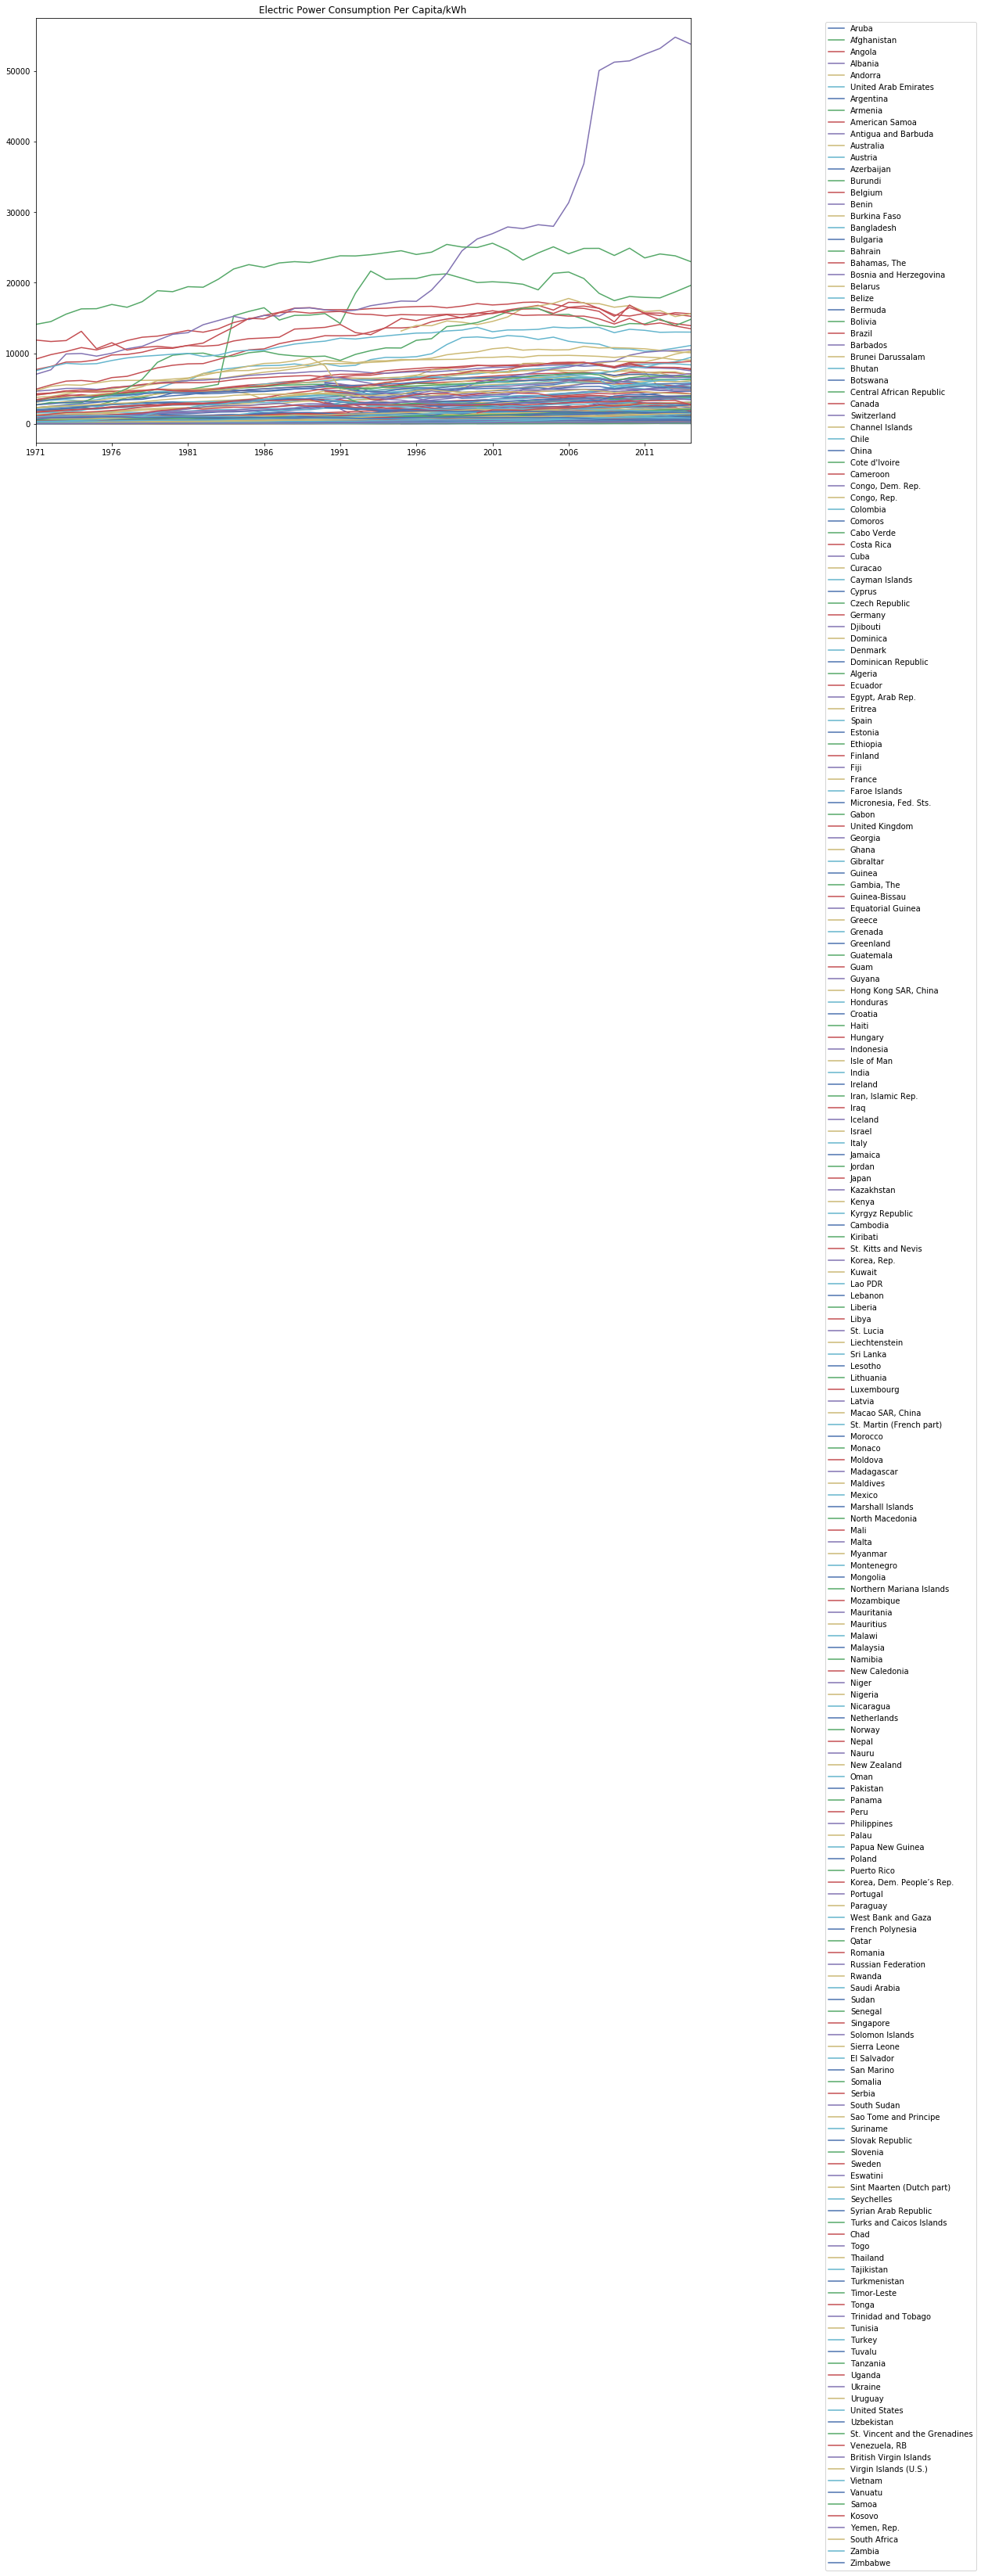

               1971          1972          1973          1974          1975  \
count    112.000000    112.000000    112.000000    112.000000    112.000000   
mean    1494.301225   1597.551476   1712.250883   1766.105963   1777.511589   
std     2377.730368   2483.923214   2663.739022   2769.445304   2683.737903   
min        6.004553      7.549785      5.757766      7.158491      6.631710   
25%      129.877167    142.219644    157.312572    168.408843    172.961631   
50%      506.686500    533.114484    568.502786    598.005578    640.660363   
75%     1952.775718   2043.815408   2173.628767   2315.214729   2505.562738   
max    14084.409610  14488.416488  15541.790006  16286.774909  16313.924068   

               1976          1977          1978          1979          1980  \
count    112.000000    112.000000    112.000000    112.000000    112.000000   
mean    1897.913419   1975.275625   2080.756493   2220.787498   2297.556735   
std     2831.403129   2859.642534   2990.104618   3

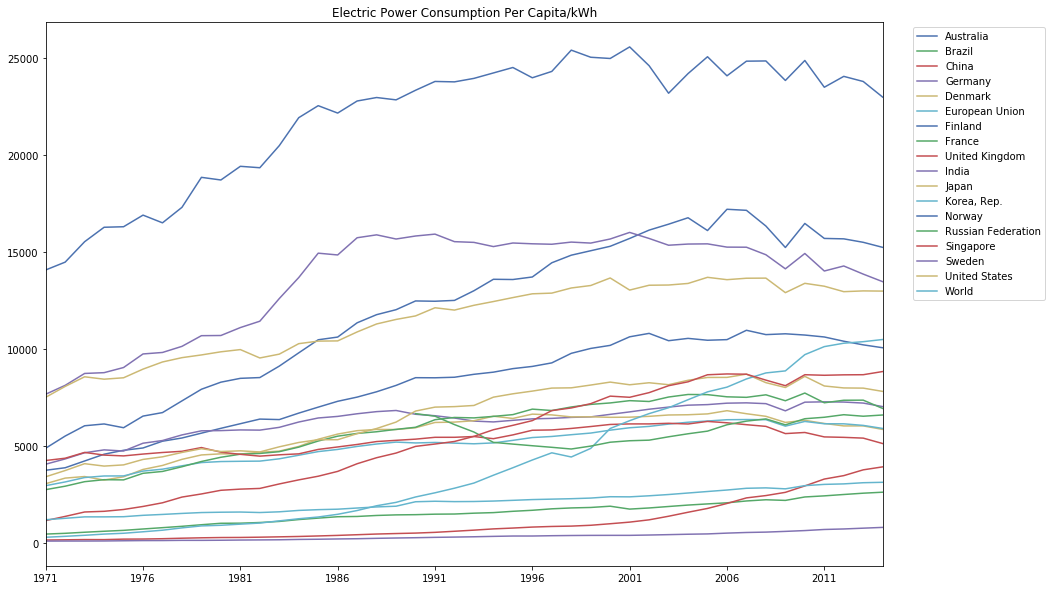

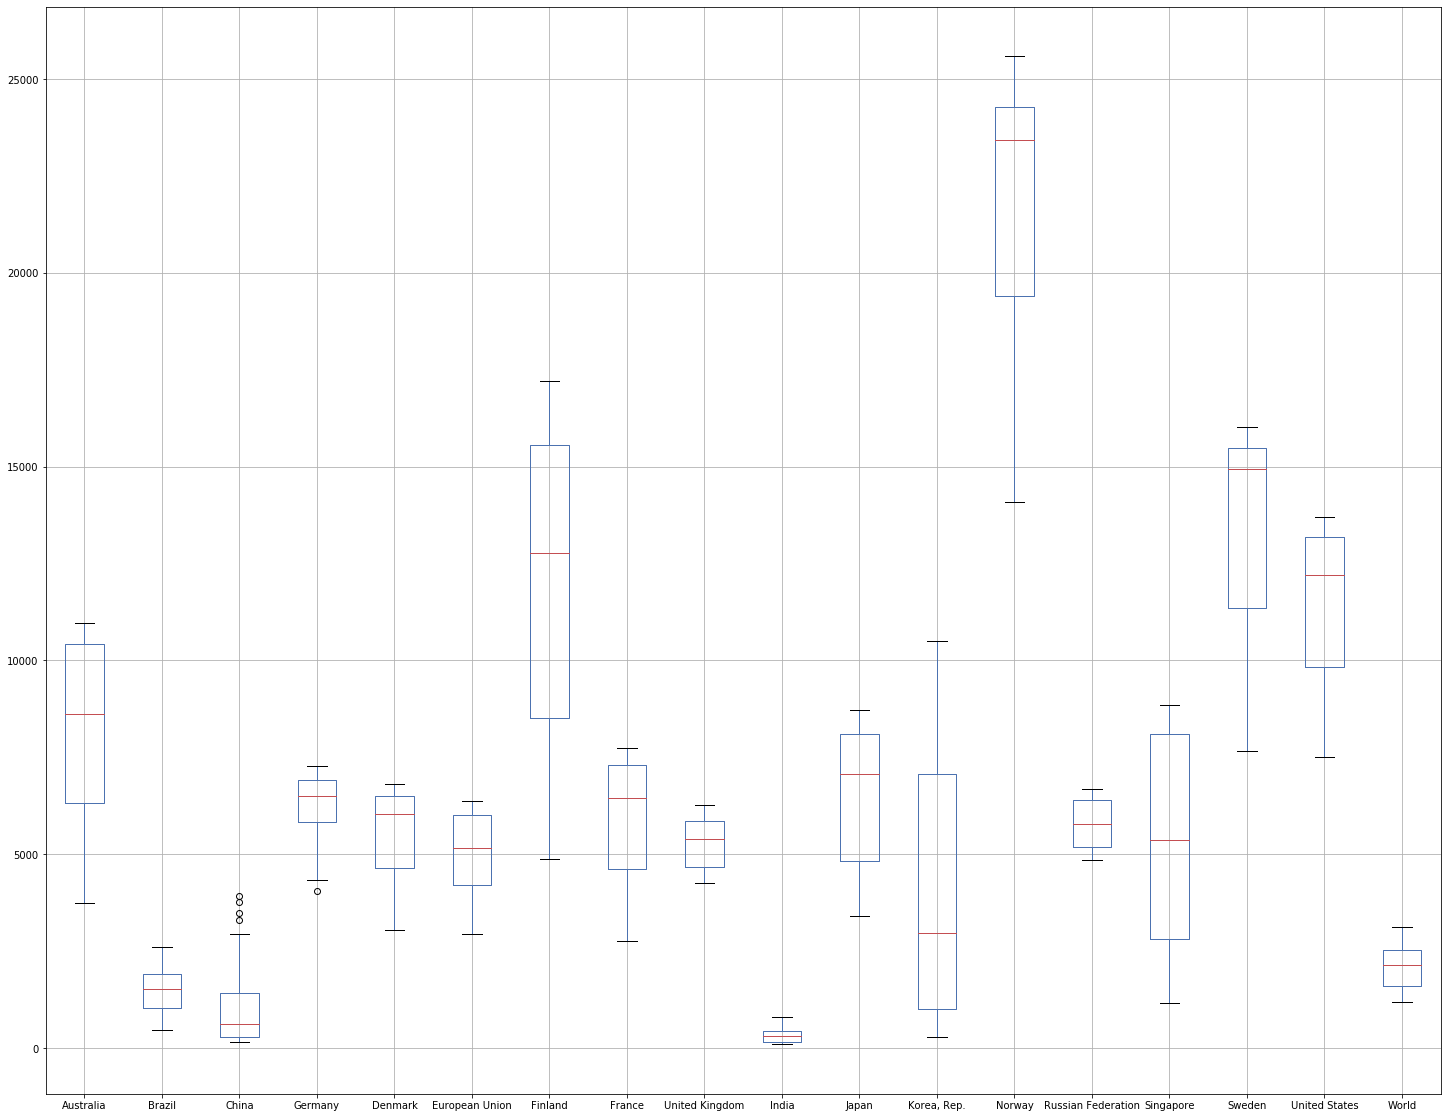

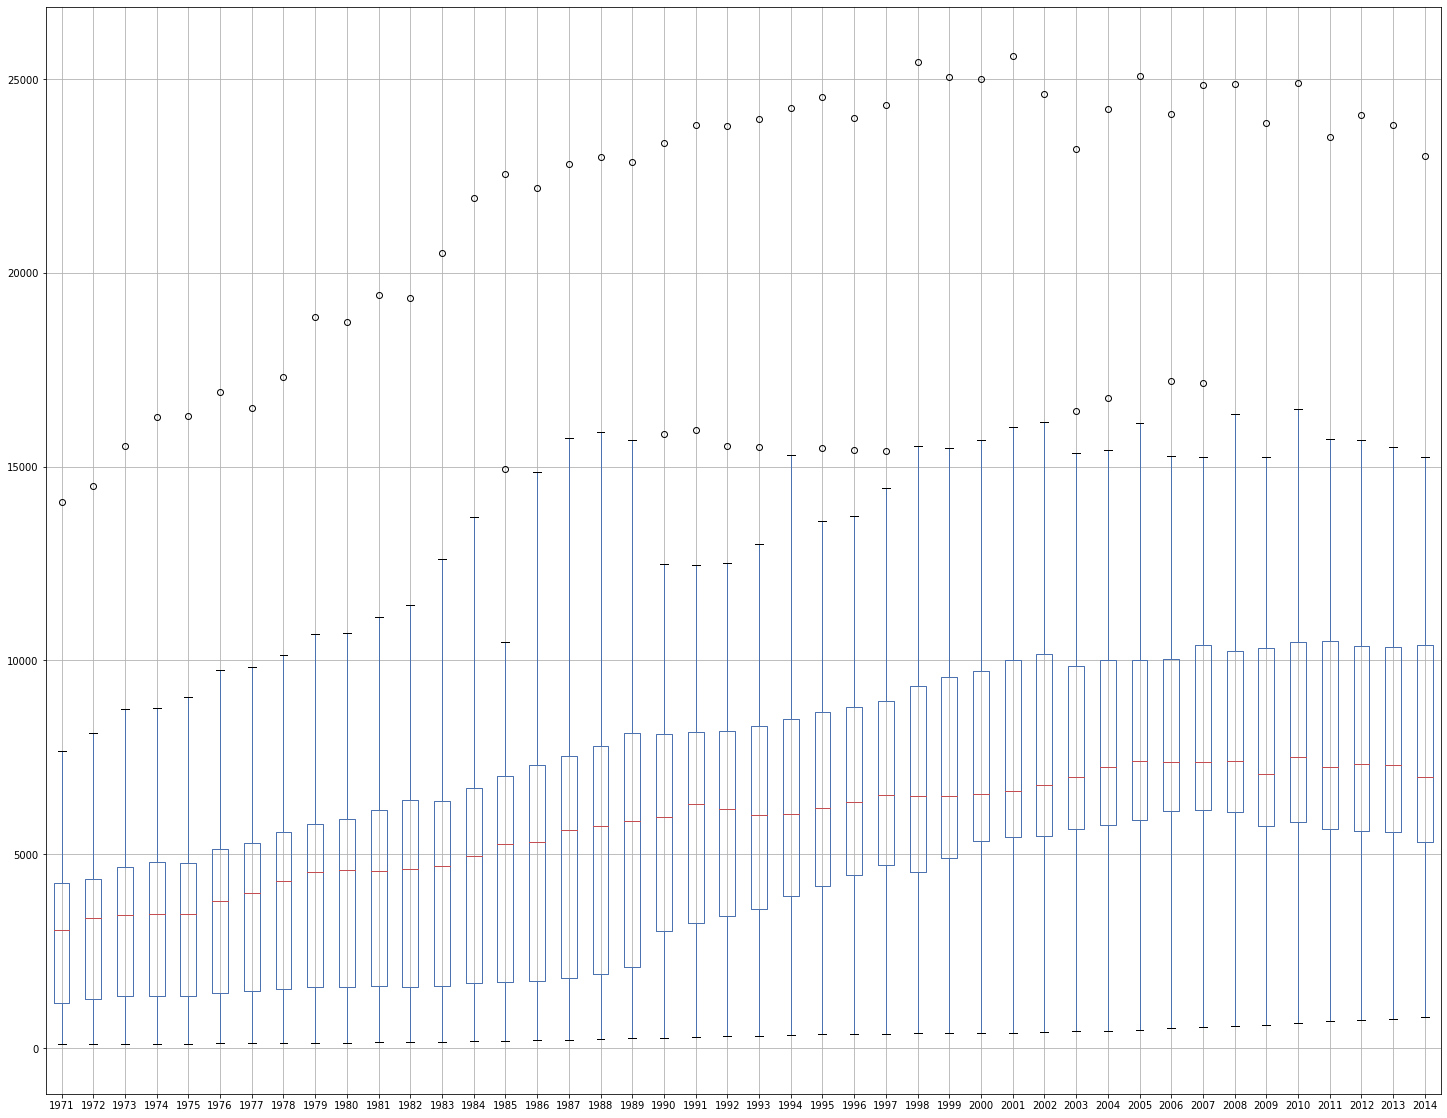

               1971          1972          1973          1974          1975  \
count     17.000000     17.000000     17.000000     17.000000     17.000000   
mean    3634.132182   3865.665292   4158.694922   4225.782693   4268.260965   
std     3555.891504   3693.018308   3954.789299   4081.795106   4092.005944   
min       97.772719    100.305074    100.632154    103.992657    114.558928   
25%     1154.810923   1273.644488   1347.567456   1347.057243   1356.064502   
50%     3059.362184   3346.825344   3428.211175   3456.644599   3459.493148   
75%     4254.652412   4372.636946   4671.718297   4803.423204   4781.616641   
max    14084.409610  14488.416488  15541.790006  16286.774909  16313.924068   

               1976          1977          1978          1979          1980  \
count     17.000000     17.000000     17.000000     17.000000     17.000000   
mean    4539.060413   4641.124299   4875.544139   5155.631527   5210.778222   
std     4271.338030   4215.933011   4384.715465   4

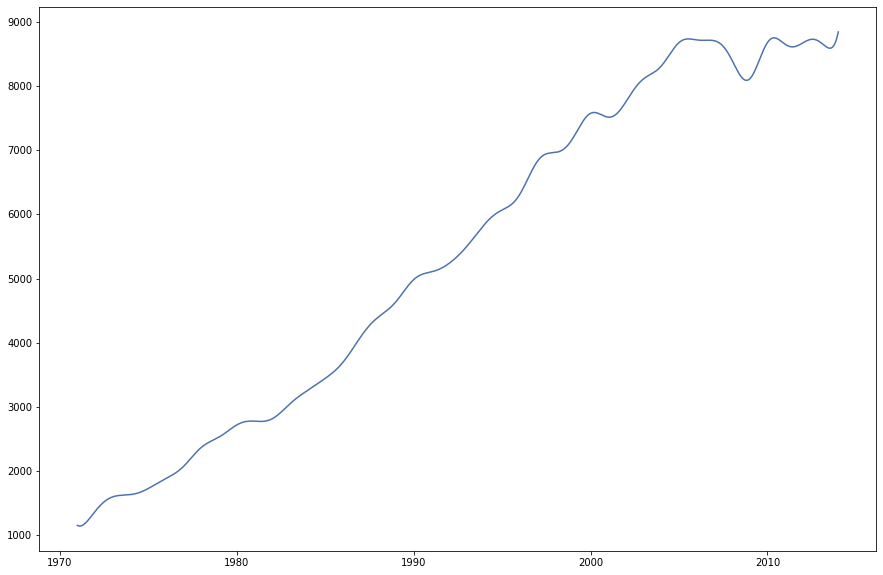

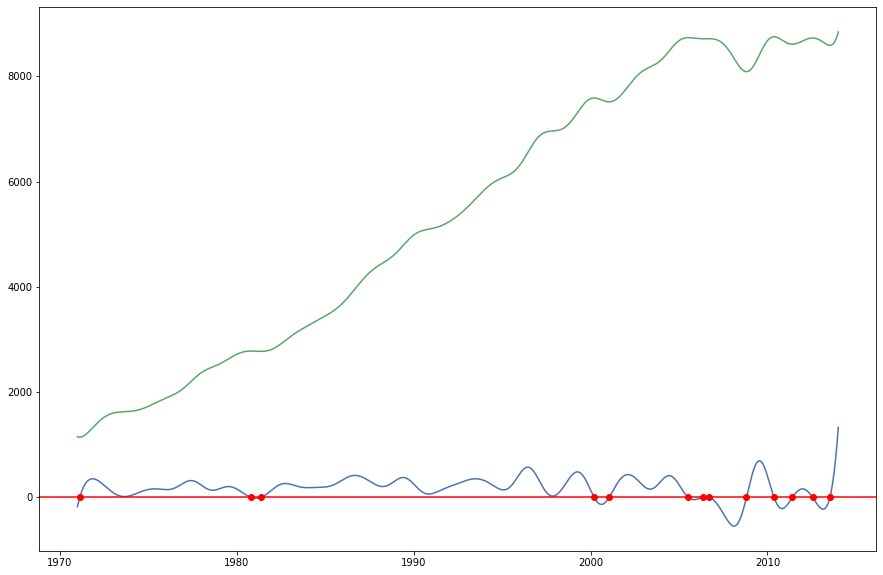

[1971.1318842512335, 1980.8282437658354, 1981.367248966529, 2000.1980264035205, 2001.0466728897186, 2005.525003333778, 2006.3564475263368, 2006.6832911054807, 2008.8106414188558, 2010.3645819442593, 2011.4081877583678, 2012.5435391385518, 2013.5240698759835]


In [8]:
p = proc(22)
eg = smooth(p[0].T, 'Singapore', 7500, 1)
print(eg)



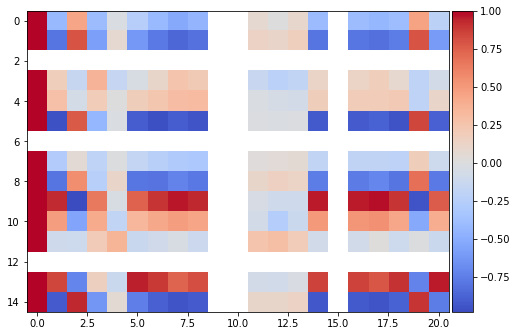

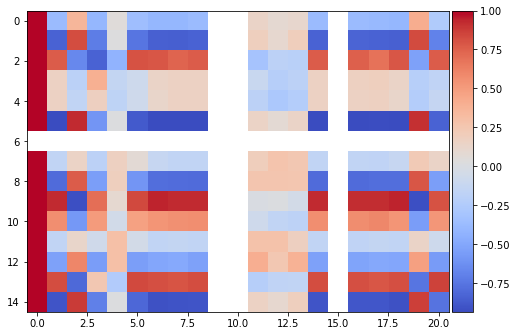

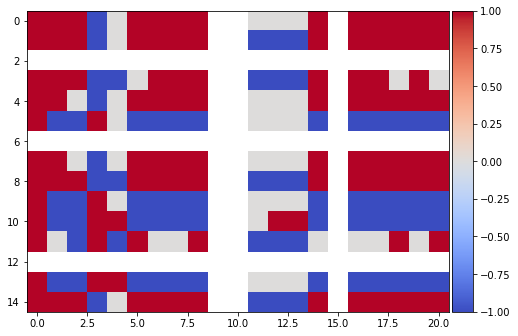

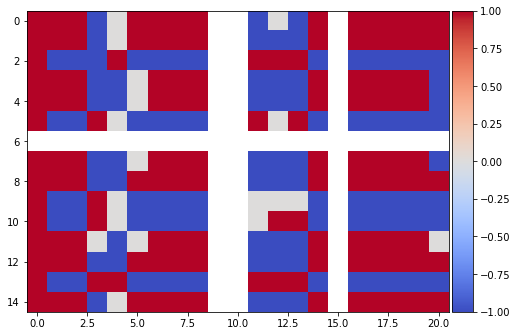

In [9]:
dfs = [proc(x, suppress=True, common=True)[0].round(5) for x in dev]
sfs = [proc(x, suppress=True, common=True)[0].round(5) for x in sus]
sfs = [sf.T['Singapore'] for sf in sfs]
dfs = [df.T['Singapore'] for df in dfs]

total_c = []
total_r = []

for sf in sfs:
    sdfs = copy.deepcopy(dfs)
    sdfs.insert(0, sf)
    val_corr = correlations(sdfs, suppress=True)
    total_c.append(val_corr[0])

    total_r.append(spearman(sdfs))

# c
plt.figure(figsize=(8, 6))
ax = plt.gca()
im = ax.imshow(total_c, interpolation='nearest', cmap='coolwarm')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()

# r
plt.figure(figsize=(8, 6))
ax = plt.gca()
im = ax.imshow(total_r, interpolation='nearest', cmap='coolwarm')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()

base = [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1]
mbase = [-x for x in base]
base.insert(0, 1)
mbase.insert(0, 1)
expected = [base, base, base,
            mbase, mbase, mbase,
            mbase, base, base,
            base, base, base,
            base, base, base]
c = copy.deepcopy(total_c)
r = copy.deepcopy(total_r)

for row in range(len(c)):
    for col in range(len(c[row])):
        y = c[row][col]
        ypred = expected[row][col]
        if np.isnan(y):
            c[row][col] = np.nan
        elif abs(y) <= 0.1:
            c[row][col] = 0
        elif (y > 0 and ypred > 0) or (y < 0 and ypred < 0):
            c[row][col] = 1
        else:
            c[row][col] = -1

for row in range(len(r)):
    for col in range(len(r[row])):
        y = r[row][col]
        ypred = expected[row][col]
        if np.isnan(y):
            r[row][col] = np.nan
        elif abs(y) <= 0.1:
            r[row][col] = 0
        elif (y > 0 and ypred > 0) or (y < 0 and ypred < 0):
            r[row][col] = 1
        else:
            r[row][col] = -1

plt.figure(figsize=(8, 6))
ax = plt.gca()
im = ax.imshow(c, interpolation='nearest', cmap='coolwarm')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()

plt.figure(figsize=(8, 6))
ax = plt.gca()
im = ax.imshow(r, interpolation='nearest', cmap='coolwarm')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()



In [ ]:
'''
#LSTM
def make_model(arr, country, n_interpolate, div, n_steps_in, n_steps_out, n_features, n_seq):
    s = smoothen(arr, country, n_interpolate)

    seq_original = s[1][0:div]
    seq = np.log2(s[1][0:div])
    seqx1, seqy = split_sequence(seq, n_steps_in, n_steps_out)
    seqx = seqx1.reshape((seqx1.shape[0], n_seq, seqx1.shape[1], n_features))

    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps_in, 1)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(50, activation='relu'))
    # model.add(Dense(n_steps_out))
    # model.add(Dropout(0.05))
    model.add(Dense(n_steps_out))
    model.compile(optimizer='adam', loss='mse')
    model.fit(seqx, seqy, epochs=5, verbose=1)
    return model, seqx1.shape[0], seqx1.shape[1], seq_original, s[0], s[1]


def model_predict(seq, model, n_iterate, shape1, n_steps_in):
    x_in_t = copy.deepcopy(seq)

    for i in range(n_iterate):
        x_in = np.log2(np.array(x_in_t[len(x_in_t) - n_steps_in:len(x_in_t)])).reshape((1, n_seq, shape1, n_features))
        yhat = model.predict(x_in, verbose=1)
        x_in_t = np.append(x_in_t, np.power(2, yhat), axis=None)

    plt.plot(x_in_t)
    plt.show()
    return x_in_t


def make_model_ghgei(arr, country, n_interpolate, div, n_steps_in, n_steps_out, n_features, n_seq):
    s = smoothen(arr, country, n_interpolate)

    seq_original = s[1][0:div]
    seq = s[1][0:div]
    seqx1, seqy = split_sequence(seq, n_steps_in, n_steps_out)
    seqx = seqx1.reshape((seqx1.shape[0], n_seq, seqx1.shape[1], n_features))

    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps_in, 1)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=3)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(75, activation=None))
    model.add(Dropout(0.5))
    # model.add(LSTM(50, activation='relu'))
    model.add(Dense(n_steps_out))
    # model.add(Dropout(0.1))
    # model.add(Dense(n_steps_out))
    model.compile(optimizer='adam', loss='mse')
    model.fit(seqx, seqy, epochs=15, verbose=1)
    return model, seqx1.shape[0], seqx1.shape[1], seq_original, s[0], s[1]


def model_predict_ghgei(seq, model, n_iterate, shape1, n_steps_in):
    x_in_t = copy.deepcopy(seq)

    for i in range(n_iterate):
        x_in = np.array(x_in_t[len(x_in_t) - n_steps_in:len(x_in_t)]).reshape((1, n_seq, shape1, n_features))
        yhat = model.predict(x_in, verbose=1)
        x_in_t = np.append(x_in_t, yhat, axis=None)

    plt.plot(x_in_t)
    plt.show()
    return x_in_t


n_steps_in, n_steps_out, n_features, n_seq = 500, 1, 1, 1

#ghge
ghg = pd.read_csv("GHGE.KT.SG.csv", index_col=0)
ghg = ghg.T.iloc[np.r_[22:43]] #from 1992
m, shape0, shape1, seq, s0, s1 = make_model(ghg, 'Singapore', 2000, 1600, n_steps_in, n_steps_out, n_features, n_seq)
p = model_predict(seq, m, 1200, shape1, n_steps_in)
m_full, shape0_full, shape1_full, seq_full, s0_full, s1_full = make_model(ghg, 'Singapore', 2000, 2000, n_steps_in, n_steps_out, n_features, n_seq)
p_full = model_predict(seq_full, m_full, 800, shape1_full, 500)

print(p[-1], p_full[-1])
plt.figure(figsize=(12, 10))
plt.plot(p, 'r--')
plt.plot(p_full, 'g')
plt.plot(s1, 'b')
plt.show()

#ghgei
ghgei = proc(34, suppress=True)[0]
val_2005 = ghgei.T['Singapore'].iloc[45]
ghgei = ghgei.T.iloc[np.r_[34:55]] #1992-2012 or 1994-2014
print(0.65*val_2005)
m_ghgei, shape0_ghgei, shape1_ghgei, seq_ghgei, s0_ghgei, s1_ghgei = make_model_ghgei(ghgei, 'Singapore', 2000, 2000, n_steps_in, n_steps_out, n_features, n_seq)

p_ghgei = model_predict_ghgei(seq_ghgei, m_ghgei, 1600, shape1_ghgei, n_steps_in)

x, y = np.r_[2000:3600].reshape(-1, 1), p_ghgei[2000:3600]
lm = linear_model.LinearRegression()
model_lr = lm.fit(x, y)
print(lm.score(x, y))
regressed = copy.deepcopy(seq_ghgei)
#print(regressed.dtypes)
pred = model_lr.predict(x)
a = np.append(regressed, pred, axis=None)

plt.figure(figsize=(15, 10))
plt.plot(p_ghgei, 'g')
plt.plot(a, 'g--')
plt.plot(s1_ghgei, 'b')
plt.show()
print(p_ghgei[-1], a[-1])
print(min(p_ghgei[2000:3600]))'''